# ** PROJET 2 - Analyse des données de systèmes éducatifs **

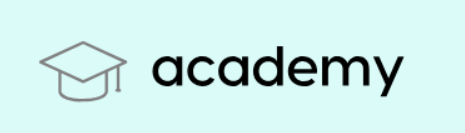

> **Academy**, startup proposant des cours en ligne, a le projet de se développer à l'international.
Il nous confie la mission d'analyse exploratoire pour savoir si les données de la Banque Mondiale permettent de valider le projet d'expansion.  
Source: [Banque Mondiale de données](https://datacatalog.worldbank.org/search/dataset/0038480)


Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.  
Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :  
- Quels sont les pays avec un fort potentiel de clients pour nos services ?  
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?  
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

In [1]:
# Installation du package Missingno pour le graphique de complétude des données

! pip install missingno

In [2]:
# Importation des diverses librairies qui pourraient nous être utiles

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
pd.set_option('display.max_row', 100)
pd.set_option('display.max_column', 100)

# Analyse de la forme des données

>**EdStatsCountry.csv**
>Contient tous les données sur les pays, d'un point de vue géographique et économique

In [4]:
# Importation EdStatsCountry.csv

stats_country = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsCountry.csv")
stats_country.head(10)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,April 2013 database update: Based on data from...,Middle East & North Africa,High income: nonOECD,AE,2007,NaN,Value added at producer prices (VAP),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,2012,NaN,2011.0,2005,NaN
7,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,2004,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,1971–84,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS

In [5]:
stats_country.shape

(241, 32)

In [6]:
print(f"EdStatsCountry contient {stats_country.shape[0]} lignes et {stats_country.shape[1]} colonnes")

EdStatsCountry contient 241 lignes et 32 colonnes


In [7]:
stats_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [8]:
# Fonction pour visualiser l'absence des données

def missing_values(X, thrs=80):
    total = X.isnull().sum().sort_values(ascending=False)
    percent = X.isnull().sum()/X.isnull().count().sort_values(ascending=False)*100
    missing_data = pd.concat([total,percent], axis=1, keys=['total', '% de Nan'])
    features_of_interest = list(missing_data[(percent<=thrs)].index)
    return features_of_interest, missing_data


features_of_interest, missing_data = missing_values(stats_country)


C:\Users\choup\AppData\Local\Temp/ipykernel_15920/333372966.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_of_interest = list(missing_data[(percent<=thrs)].index)


In [9]:
print(features_of_interest)

['Other groups', 'Latest industrial data', 'Vital registration complete', 'External debt Reporting status', 'Latest household survey', 'Latest agricultural census', 'Lending category', 'PPP survey year', 'Special Notes', 'Source of most recent Income and expenditure data', 'Government Accounting concept', 'Latest water withdrawal data', 'IMF data dissemination standard', 'Balance of Payments Manual in use', 'Latest trade data', 'SNA price valuation', 'System of trade', 'National accounts base year', 'Latest population census', 'Region', 'Income Group', 'Currency Unit', 'System of National Accounts', '2-alpha code', 'WB-2 code', 'Long Name', 'Short Name', 'Table Name', 'Country Code']


In [10]:
missing_data

,total,% de Nan
Unnamed: 31,241,100.000000
National accounts reference year,209,86.721992
Alternative conversion factor,194,80.497925
Other groups,183,75.933610
Latest industrial data,134,55.601660
Vital registration complete,130,53.941909
External debt Reporting status,117,48.547718
Latest household survey,100,41.493776
Latest agricultural census,99,41.078838
Lending category,97,40.248963


<AxesSubplot:>

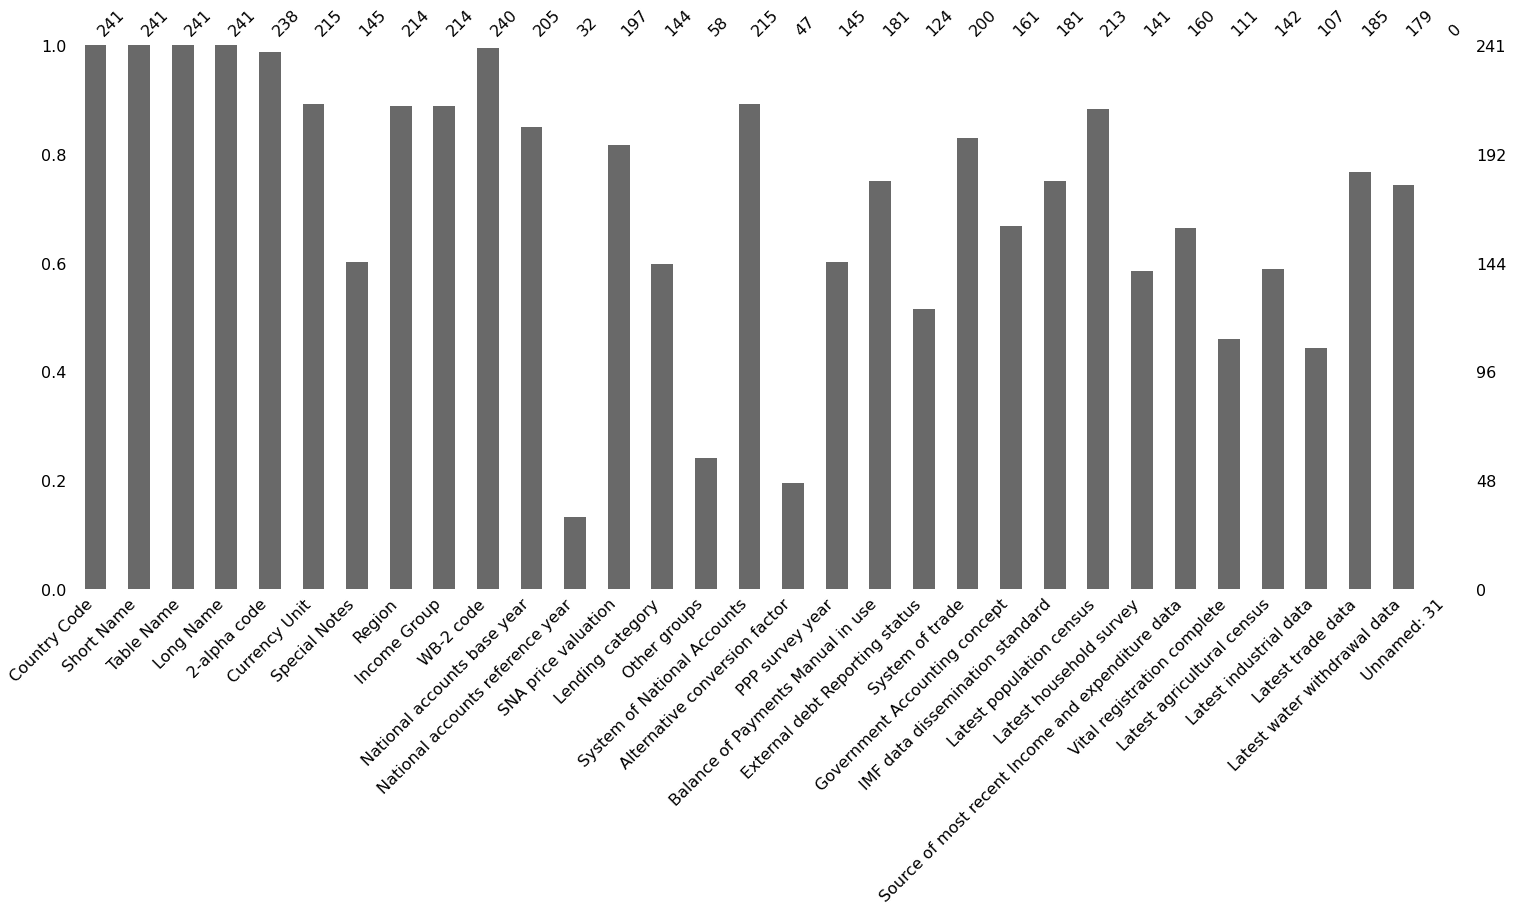

In [11]:
msno.bar(stats_country.sample(241))

In [12]:
# Vérifier qu'il n'y a pas de doublon dans la colonne "Country Code" qui représente l'ensemble des pays

stats_country.duplicated('Country Code', keep='first').sum()

0

In [13]:
# Nombre de pays par région

stats_country.groupby('Region')['Country Code'].count().sort_values(ascending=False)

Region
Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Country Code, dtype: int64

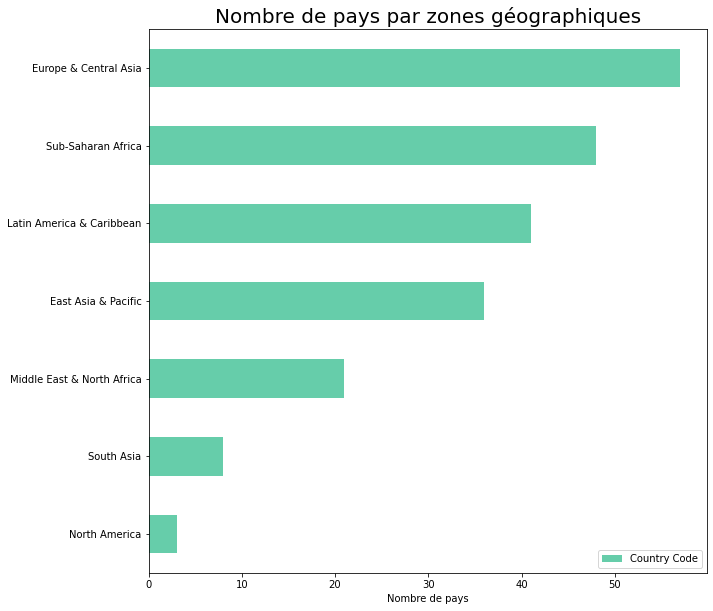

In [14]:
plt.figure(figsize = (10,10))

stats_country.groupby('Region')['Country Code'].count().sort_values(ascending=True).plot(kind='barh', color ="mediumaquamarine")


plt.title('Nombre de pays par zones géographiques', fontsize=20)
plt.xlabel('Nombre de pays')
plt.ylabel('')
plt.legend()

plt.show()

Nous constatons que l'Europe et l'Asie Centrale est la plus grande région en terme de nombre de pays. Ce dataframe peut être intéressant à explorer pour affecter à chaque pays, sa région (Region) et son appartenance à son groupe de revenus (Income Group).

---

>**EdStatsCountry-Series.csv**
> Il contient les sources des études

In [15]:
# Importation EdStatsCountry-Series.csv

stats_country_series = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsCountry-Series.csv")
stats_country_series.head(10)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
5,AFG,NY.GDP.MKTP.PP.KD,Estimates are based on regression.,NaN
6,AFG,NY.GNP.MKTP.PP.CD,Estimates are based on regression.,NaN
7,AFG,NY.GDP.MKTP.PP.CD,Estimates are based on regression.,NaN
8,AFG,NY.GDP.PCAP.PP.KD,Estimates are based on regression.,NaN
9,AFG,NY.GNP.PCAP.PP.CD,Estimates are based on regression.,NaN


In [16]:
stats_country_series.shape

(613, 4)

In [17]:
print(f"EdStatsCountry-Series contient {stats_country_series.shape[0]} lignes et {stats_country_series.shape[1]} colonnes")

EdStatsCountry-Series contient 613 lignes et 4 colonnes


In [18]:
stats_country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [19]:
# % de données absentes

missing_values(stats_country_series)

C:\Users\choup\AppData\Local\Temp/ipykernel_15920/333372966.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_of_interest = list(missing_data[(percent<=thrs)].index)


(['CountryCode', 'SeriesCode', 'DESCRIPTION'],
              total  % de Nan
 Unnamed: 3     613     100.0
 CountryCode      0       0.0
 SeriesCode       0       0.0
 DESCRIPTION      0       0.0)

<AxesSubplot:>

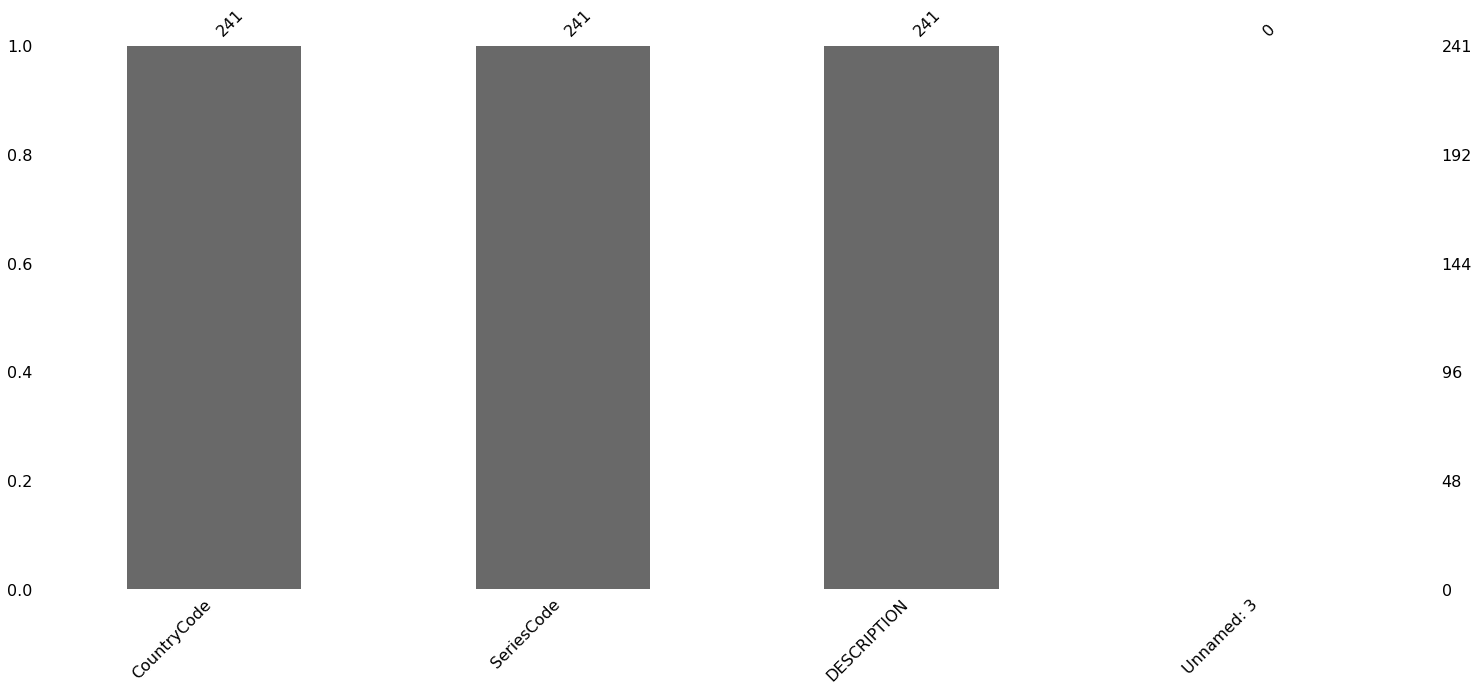

In [20]:
msno.bar(stats_country_series.sample(241))

---

>**EdStatsData.csv**
>Contient les indicateurs des études des systèmes éducatifs, par pays et par année, de 1970 à 2100.

In [21]:
# Importation EdStatsData.csv

stats_data = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsData.csv")
stats_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
stats_data.shape

(886930, 70)

In [23]:
print(f"EdStatsData contient {stats_data.shape[0]} lignes et {stats_data.shape[1]} colonnes")

EdStatsData contient 886930 lignes et 70 colonnes


In [24]:
stats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [25]:
# % de données absentes

missing_values(stats_data)

C:\Users\choup\AppData\Local\Temp/ipykernel_15920/333372966.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_of_interest = list(missing_data[(percent<=thrs)].index)


(['2005',
  '2010',
  'Country Code',
  'Indicator Code',
  'Indicator Name',
  'Country Name'],
                  total    % de Nan
 Unnamed: 69     886930  100.000000
 2017            886787   99.983877
 2016            870470   98.144160
 1971            851393   95.993258
 1973            851385   95.992356
 1972            851311   95.984012
 1974            851200   95.971497
 1979            850121   95.849842
 1976            849447   95.773849
 1982            849419   95.770692
 1989            849390   95.767422
 1977            849356   95.763589
 1978            849354   95.763364
 1983            848470   95.663694
 1988            848378   95.653321
 1984            848324   95.647233
 1987            848289   95.643286
 1981            848153   95.627953
 1986            847558   95.560867
 2045            835494   94.200670
 2070            835494   94.200670
 2065            835494   94.200670
 2060            835494   94.200670
 2055            835494   94.200670
 20

<AxesSubplot:>

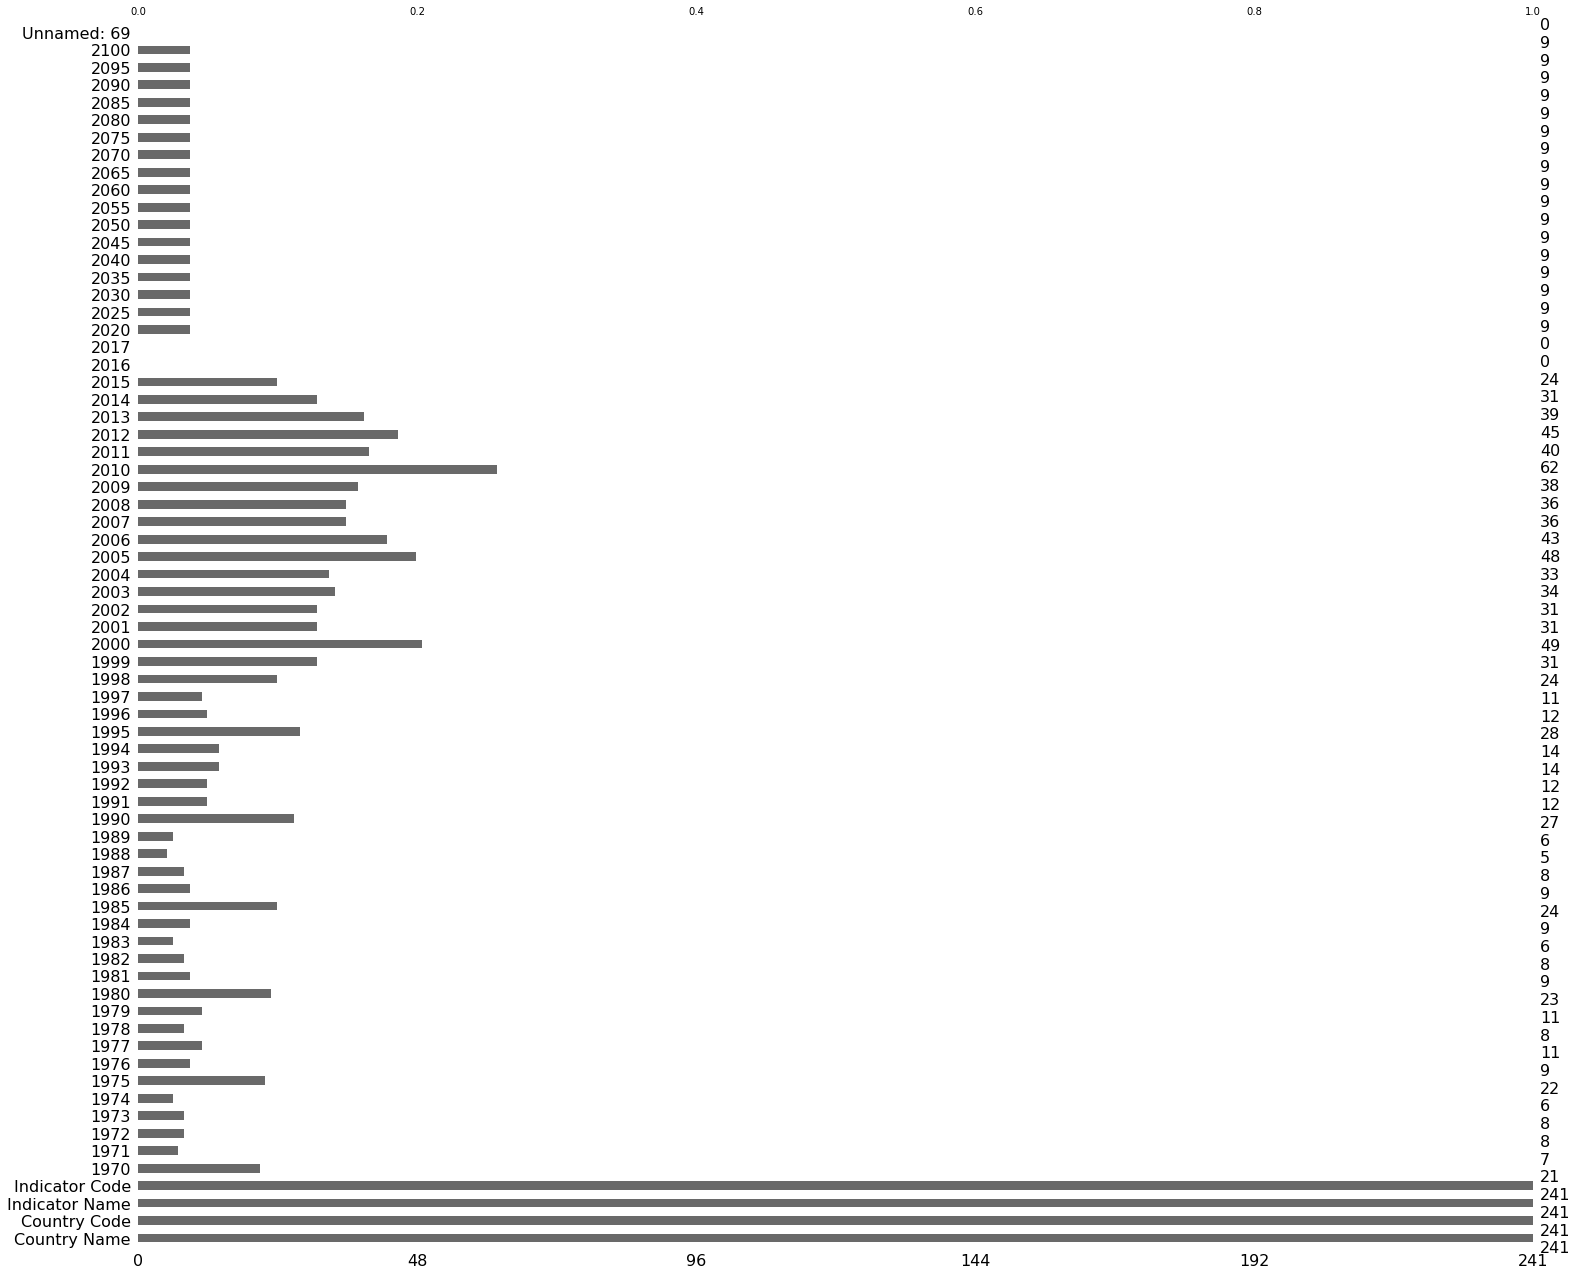

In [26]:
msno.bar(stats_data.sample(241))

In [27]:
stats_data['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [28]:
stats_data['Indicator Name'].tolist()

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

Ce jeu de donnée représentera la base de notre analyse car il contient tous les indicateurs liés à l'éducation que nous pourrons exploiter pour cette problématique.

---

>**EdStatsFootNote.csv**
> Il contient des informations sur les codes et les dates des indicateurs 

In [29]:
# Importation EdStatsFootNote

stats_foot_note = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsFootNote.csv")
stats_foot_note.head(20)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
5,ABW,SE.PRE.NENR,YR2000,Country estimation.,NaN
6,ABW,SE.SEC.ENRL.VO.FE,YR2005,Country estimation.,NaN
7,ABW,SE.SEC.ENRL.GC,YR2003,Country estimation.,NaN
8,ABW,SE.PRM.TCHR.FE,YR1999,Country estimation.,NaN
9,ABW,SE.PRE.TCHR.FE.ZS,YR2008,Country estimation.,NaN


In [30]:
stats_foot_note.shape

(643638, 5)

In [31]:
print(f"EdStatsFootNote contient {stats_foot_note.shape[0]} lignes et {stats_foot_note.shape[1]} colonnes")

EdStatsFootNote contient 643638 lignes et 5 colonnes


In [32]:
stats_foot_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [33]:
# % de données absentes

missing_values(stats_foot_note)

C:\Users\choup\AppData\Local\Temp/ipykernel_15920/333372966.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_of_interest = list(missing_data[(percent<=thrs)].index)


(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION'],
               total  % de Nan
 Unnamed: 4   643638     100.0
 CountryCode       0       0.0
 SeriesCode        0       0.0
 Year              0       0.0
 DESCRIPTION       0       0.0)

<AxesSubplot:>

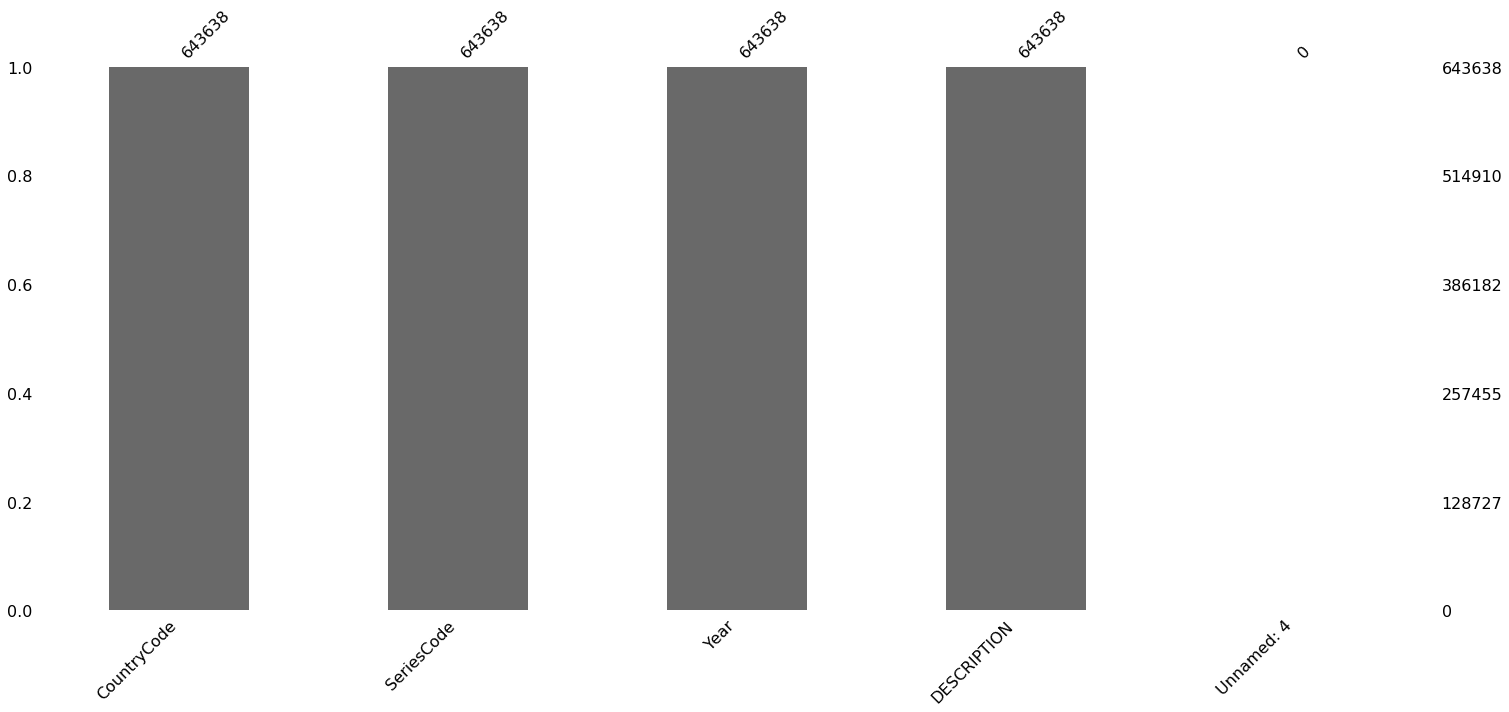

In [34]:
msno.bar(stats_foot_note.sample(643638))

---

>**EdStatsSeries.csv**
> Il contient des informations sur la définition des indicateurs.

In [35]:
# Importation du fichier EdSstatsSeries

stats_series = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsSeries.csv")
stats_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
stats_series.shape

(3665, 21)

In [37]:
print(f"EdStatsSeries contient {stats_series.shape[0]} lignes et {stats_series.shape[1]} colonnes")

EdStatsSeries contient 3665 lignes et 21 colonnes


In [38]:
stats_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [39]:
# % de données absentes

missing_values(stats_series)

C:\Users\choup\AppData\Local\Temp/ipykernel_15920/333372966.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_of_interest = list(missing_data[(percent<=thrs)].index)


(['Short definition',
  'Topic',
  'Source',
  'Long definition',
  'Indicator Name',
  'Series Code'],
                                      total    % de Nan
 Unnamed: 20                           3665  100.000000
 Notes from original source            3665  100.000000
 License Type                          3665  100.000000
 Related indicators                    3665  100.000000
 Other web links                       3665  100.000000
 Unit of measure                       3665  100.000000
 Development relevance                 3662   99.918145
 General comments                      3651   99.618008
 Limitations and exceptions            3651   99.618008
 Statistical concept and methodology   3642   99.372442
 Aggregation method                    3618   98.717599
 Periodicity                           3566   97.298772
 Related source links                  3450   94.133697
 Base Period                           3351   91.432469
 Other notes                           3113   84.938608


<AxesSubplot:>

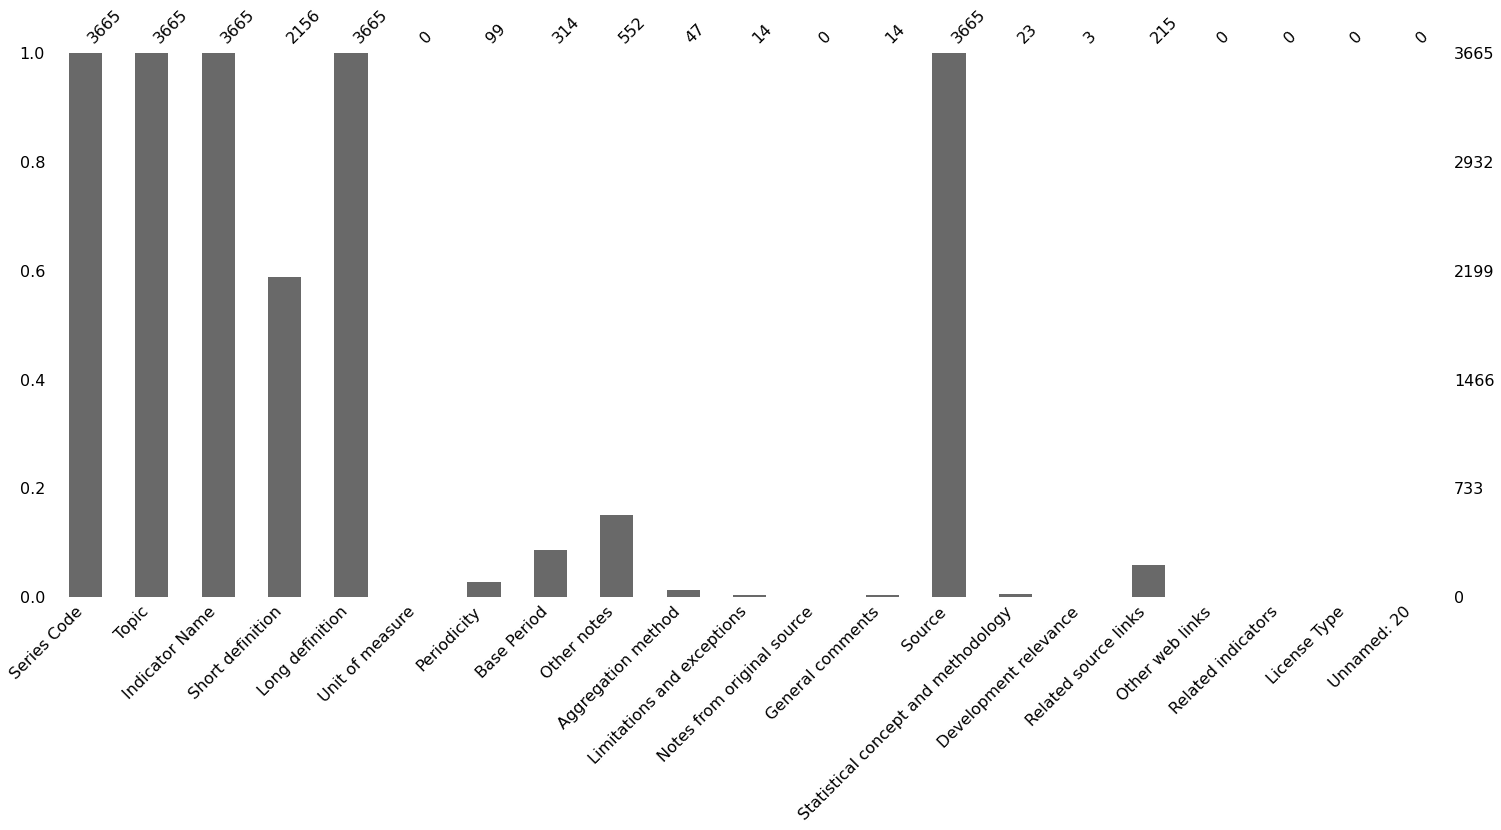

In [40]:
msno.bar(stats_series.sample(3665))

---

# Analyse de fond: choix des indictateurs

  

**Méthode appliquée:**  
- Les indicateurs ont été sélectionnés en fonction de leur pertinence avec la problématique. Sur les 4000 indicateurs proposés, 7 ont été pré-sélectionnés en amont. Suite à une première analyse de cohérence et de complétude, seulement 3 ont été retenus, plus l'indicateur démographique.
- Afin de pouvoir étudier sur les zones géographiques dans un premier temps, nous avons fusionné les données de ***stats_data*** et de ***stats_country***
- La colonne "Unnamed:69" qui était alors vide, devient une nouvelle colonne "Dernieres_Donnees_Dispo" qui nous servira à récupérer la dernière valeur disponible pour chaqun des indicateurs (complétude)
- Pour chaque indicateurs, nous trions les ***100 premiers pays*** qui ont les  indicateurs les plus élevés

Les indicateurs sont:
- **Population, total** ==> Population totale, donnée démographique importante  
Cet indicateur nous permettra de prendre en compte la taille du pays  
  
- **Enrolment in secondary education, both sexes (number)** ==> Scolarisation dans l'enseignement secondaire, les deux sexes (nombre)  
Cet indicateur mesure le potentiel d'élèves à travers la scolarisation du secondaire  
  
- **Expenditure on secondary as % of government expenditure on education (%)** ==> Dépenses pour le secondaire en % des dépenses publiques pour l'éducation (%)  
Cet indicateur permet de voir la tendance des pays à investir pour l'éducation des enfants, principalement dans le secondaire.    
- **Internet users (per 100 people)** ==> Utilisateurs d'internet (pour 100 personnes)  
Cet indicateur serait à mon sens le premier à prendre en compte. Un pays sans développement d'Internet ne pourrait pas promouvoir les cours en ligne.

In [41]:
# Conservation des années que l'on souhaite étudier

stats_data_annee = stats_data[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2000', '2001', '2002', '2003', '2004', '2005',
                    '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016','2017', 'Unnamed: 69']]

In [42]:
indicateurs = (
    'Population, total', 
    'Enrolment in secondary education, both sexes (number)',
    'Expenditure on secondary as % of government expenditure on education (%)', 
    'Internet users (per 100 people)'
)

In [43]:
# Fusion des dataframes stats_data_annee et stats_country

df_base = pd.merge(stats_data_annee, stats_country[['Country Code', 'Region', 'Income Group']],how='left', on='Country Code')
df_base = df_base[df_base['Indicator Name'].isin(indicateurs)]
df_base.rename(columns={'Unnamed: 69':'Dernieres_Donnees_Dispo'}, inplace=True) # réaffectation du nom de la colonne
df_base.dropna(subset=['Region'], axis=0, inplace=True) # suppression des régions/income group des index pour ne traiter que les pays
df_base.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernieres_Donnees_Dispo,Region,Income Group
92816,Afghanistan,AFG,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,NaN,3.624150e+05,NaN,4.068950e+05,5.943060e+05,6.514530e+05,1.006841e+06,1035782.0,1425009.00,1716190.00,2.044157e+06,2.208963e+06,2.415884e+06,2.538420e+06,2.602734e+06,2.698816e+06,NaN,NaN,NaN,South Asia,Low income
92861,Afghanistan,AFG,Expenditure on secondary as % of government ex...,SE.XPD.SECO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.669373e+01,2.662432e+01,2.539486e+01,2.577935e+01,2.539206e+01,2.435630e+01,NaN,NaN,NaN,South Asia,Low income
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,4.722568e-03,4.561395e-03,8.789125e-02,1.058090e-01,1.224148e+00,2.107124e+00,1.9,1.84,3.55,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00,1.059573e+01,NaN,NaN,South Asia,Low income
94158,Afghanistan,AFG,"Population, total",SP.POP.TOTL,20093756.0,2.096646e+07,2.197992e+07,2.306485e+07,2.411898e+07,2.507080e+07,2.589345e+07,26616792.0,27294031.00,28004331.00,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,NaN,NaN,South Asia,Low income
96481,Albania,ALB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,365664.0,3.779360e+05,3.822050e+05,3.960950e+05,3.935030e+05,4.074030e+05,4.089800e+05,410444.0,406553.00,354587.00,3.558710e+05,3.551580e+05,3.492690e+05,3.463650e+05,3.332910e+05,3.150790e+05,NaN,NaN,NaN,Europe & Central Asia,Upper middle income


In [44]:
# La complétude de la colonne "Derniere_Donnees_Dispo" se fait en récupérant la dernière donnée disponible

df_completude = df_base.fillna(method='ffill', axis=1)
df_completude.head(50)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernieres_Donnees_Dispo,Region,Income Group
92816,Afghanistan,AFG,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,SE.SEC.ENRL,362415.0,362415.0,406895.0,594306.0,651453.0,1006841.0,1035782.0,1425009.0,1716190.0,2044157.0,2208963.0,2415884.0,2538420.0,2602734.0,2698816.0,2698816.0,2698816.0,2698816.0,South Asia,Low income
92861,Afghanistan,AFG,Expenditure on secondary as % of government ex...,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,26.693729,26.624319,25.394859,25.77935,25.392059,24.3563,24.3563,24.3563,24.3563,South Asia,Low income
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,IT.NET.USER.P2,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,1.9,1.84,3.55,4.0,5.0,5.454545,5.9,7.0,8.26,10.595726,10.595726,10.595726,South Asia,Low income
94158,Afghanistan,AFG,"Population, total",SP.POP.TOTL,20093756.0,20966463.0,21979923.0,23064851.0,24118979.0,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,34656032.0,34656032.0,South Asia,Low income
96481,Albania,ALB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,365664.0,377936.0,382205.0,396095.0,393503.0,407403.0,408980.0,410444.0,406553.0,354587.0,355871.0,355158.0,349269.0,346365.0,333291.0,315079.0,315079.0,315079.0,315079.0,Europe & Central Asia,Upper middle income
96526,Albania,ALB,Expenditure on secondary as % of government ex...,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,19.83156,19.83156,19.83156,19.83156,19.83156,19.83156,Europe & Central Asia,Upper middle income
96665,Albania,ALB,Internet users (per 100 people),IT.NET.USER.P2,0.114097,0.325798,0.390081,0.9719,2.420388,6.043891,9.609991,15.036115,23.86,41.2,45.0,49.0,54.655959,57.2,60.1,63.252933,66.363445,66.363445,66.363445,Europe & Central Asia,Upper middle income
97823,Albania,ALB,"Population, total",SP.POP.TOTL,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2876101.0,2876101.0,Europe & Central Asia,Upper middle income
100146,Algeria,DZA,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,2994258.0,3188826.0,3352340.0,3455930.0,3604785.0,3654232.0,3664852.0,3724095.0,3984536.0,4576166.0,4616226.0,4572513.0,4572513.0,4572513.0,4572513.0,4572513.0,4572513.0,4572513.0,4572513.0,Middle East & North Africa,Upper middle income
100191,Algeria,DZA,Expenditure on secondary as % of government ex...,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,Middle East & North Africa,Upper middle income


In [45]:
df = df_completude.drop(list(df_completude.filter(regex="^[-+]?[0-9]+$").columns), axis=1) # suppression des années
df = df[['Region', 'Income Group', 'Country Name', 'Indicator Name', 'Dernieres_Donnees_Dispo']] # réaménagement du dataframe
df['Dernieres_Donnees_Dispo'] = pd.to_numeric(df['Dernieres_Donnees_Dispo'],errors='coerce', downcast="float") # suite à fillna,
# les données de "Dernieres_Donnees_Dispo" sont à reconvertir en float

df.head(50)

,Region,Income Group,Country Name,Indicator Name,Dernieres_Donnees_Dispo
92816,South Asia,Low income,Afghanistan,"Enrolment in secondary education, both sexes (...",2.698816e+06
92861,South Asia,Low income,Afghanistan,Expenditure on secondary as % of government ex...,2.435630e+01
93000,South Asia,Low income,Afghanistan,Internet users (per 100 people),1.059573e+01
94158,South Asia,Low income,Afghanistan,"Population, total",3.465603e+07
96481,Europe & Central Asia,Upper middle income,Albania,"Enrolment in secondary education, both sexes (...",3.150790e+05
96526,Europe & Central Asia,Upper middle income,Albania,Expenditure on secondary as % of government ex...,1.983156e+01
96665,Europe & Central Asia,Upper middle income,Albania,Internet users (per 100 people),6.636344e+01
97823,Europe & Central Asia,Upper middle income,Albania,"Population, total",2.876101e+06
100146,Middle East & North Africa,Upper middle income,Algeria,"Enrolment in secondary education, both sexes (...",4.572513e+06
100191,Middle East & North Africa,Upper middle income,Algeria,Expenditure on secondary as % of government ex...,NaN


In [46]:
df.dtypes

Region                      object
Income Group                object
Country Name                object
Indicator Name              object
Dernieres_Donnees_Dispo    float32
dtype: object

In [47]:
df.shape

(856, 5)

<AxesSubplot:>

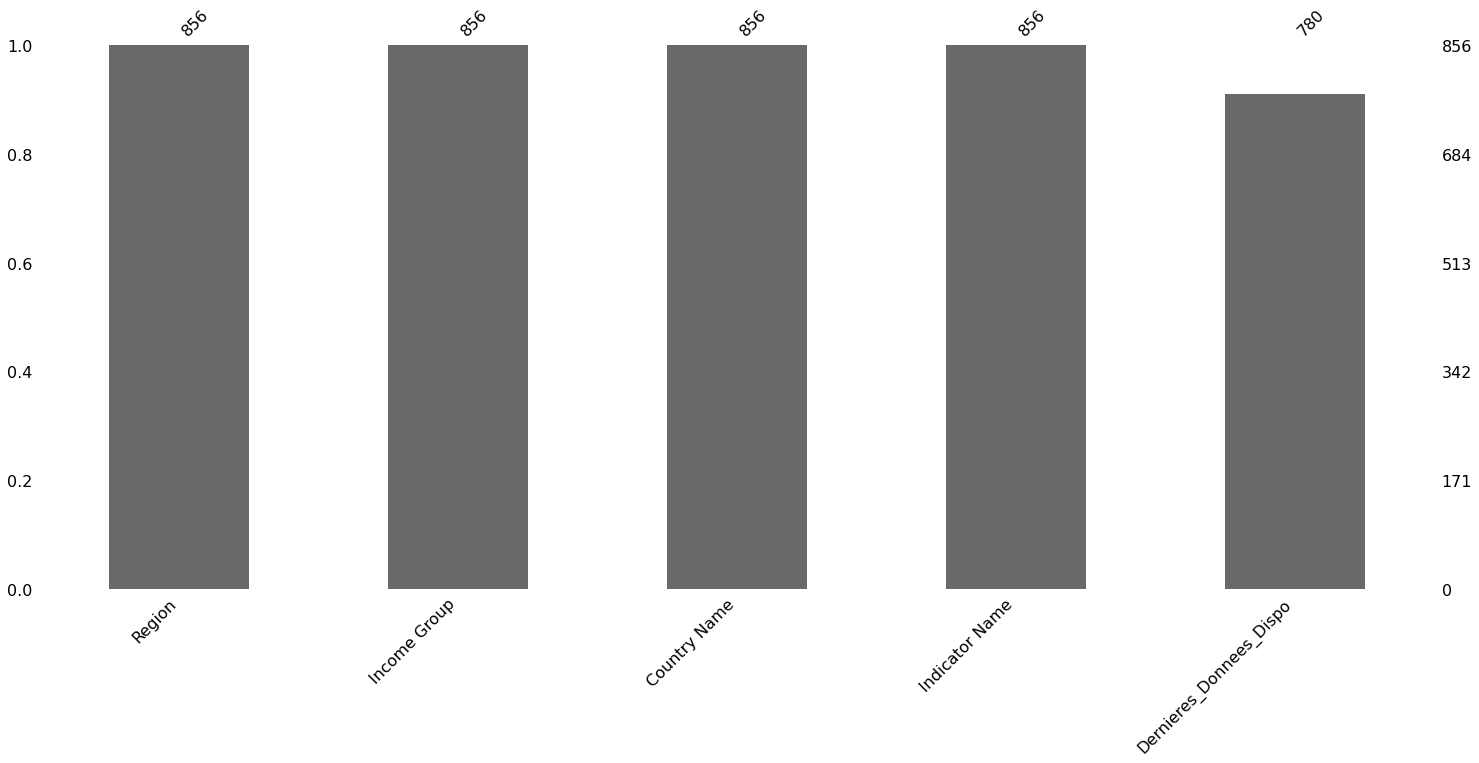

In [48]:
msno.bar(df.sample(856))

In [49]:
# Nous voyons ici, quels sont les pays dont les données restent absentes malgrès le remplissage. Compte tenu des pays concernés
# et de l'indicateur majoritairement représenté ('Expenditure..'), nous choisissons de supprimer les lignes concernées.

df[df['Dernieres_Donnees_Dispo'].isna()]

,Region,Income Group,Country Name,Indicator Name,Dernieres_Donnees_Dispo
100191,Middle East & North Africa,Upper middle income,Algeria,Expenditure on secondary as % of government ex...,NaN
103811,East Asia & Pacific,Upper middle income,American Samoa,"Enrolment in secondary education, both sexes (...",NaN
103856,East Asia & Pacific,Upper middle income,American Samoa,Expenditure on secondary as % of government ex...,NaN
103995,East Asia & Pacific,Upper middle income,American Samoa,Internet users (per 100 people),NaN
136796,Europe & Central Asia,Upper middle income,Azerbaijan,"Enrolment in secondary education, both sexes (...",NaN
136841,Europe & Central Asia,Upper middle income,Azerbaijan,Expenditure on secondary as % of government ex...,NaN
140506,Latin America & Caribbean,High income: nonOECD,"Bahamas, The",Expenditure on secondary as % of government ex...,NaN
155166,Europe & Central Asia,Upper middle income,Belarus,Expenditure on secondary as % of government ex...,NaN
180821,Europe & Central Asia,Upper middle income,Bosnia and Herzegovina,Expenditure on secondary as % of government ex...,NaN
235751,Europe & Central Asia,High income: nonOECD,Channel Islands,"Enrolment in secondary education, both sexes (...",NaN


In [50]:
df = df.dropna(axis=0, how='any')
df.isna().sum() # vérification que le tableau ne comporte plus de données Nan

Region                     0
Income Group               0
Country Name               0
Indicator Name             0
Dernieres_Donnees_Dispo    0
dtype: int64

---

### Indicateur: Population, total

In [51]:
df_pop = df[df['Indicator Name'].isin(['Population, total'])].sort_values('Dernieres_Donnees_Dispo', ascending=False)
df_pop.head(100)

,Region,Income Group,Country Name,Indicator Name,Dernieres_Donnees_Dispo
244423,East Asia & Pacific,Upper middle income,China,"Population, total",1.378665e+09
416678,South Asia,Lower middle income,India,"Population, total",1.324171e+09
849148,North America,High income: OECD,United States,"Population, total",3.231275e+08
420343,East Asia & Pacific,Lower middle income,Indonesia,"Population, total",2.611155e+08
189448,Latin America & Caribbean,Upper middle income,Brazil,"Population, total",2.076529e+08
636578,South Asia,Lower middle income,Pakistan,"Population, total",1.932035e+08
621918,Sub-Saharan Africa,Lower middle income,Nigeria,"Population, total",1.859896e+08
149133,South Asia,Low income,Bangladesh,"Population, total",1.629516e+08
680558,Europe & Central Asia,High income: nonOECD,Russian Federation,"Population, total",1.443424e+08
559613,Latin America & Caribbean,Upper middle income,Mexico,"Population, total",1.275404e+08


<AxesSubplot:xlabel='Dernieres_Donnees_Dispo', ylabel='Region'>

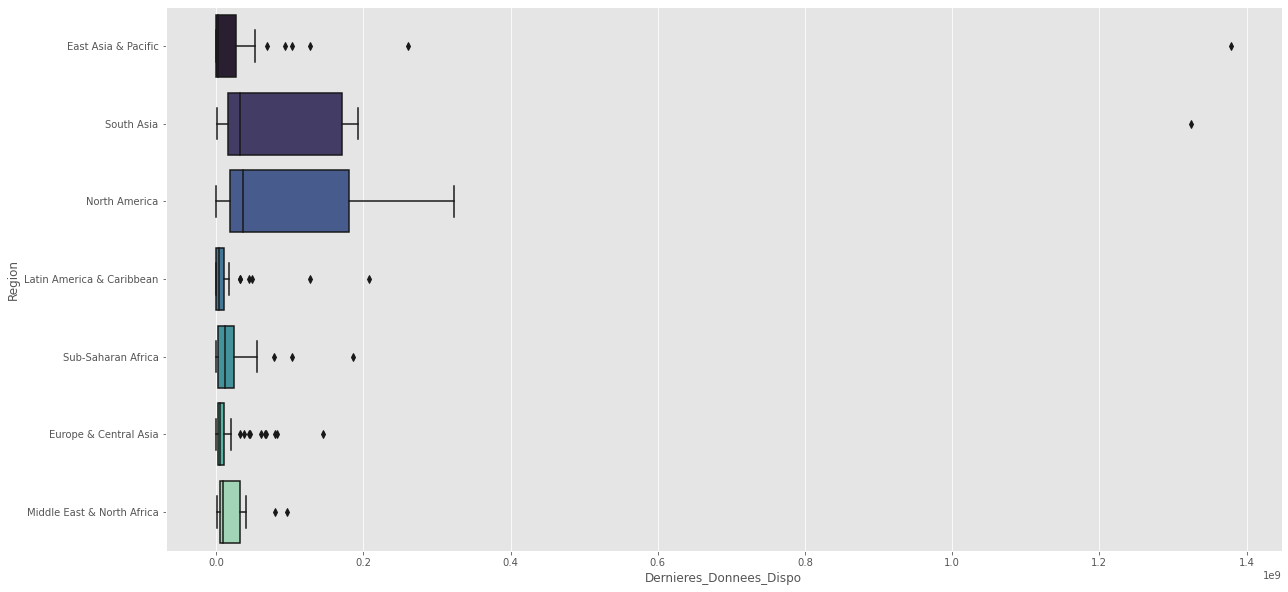

In [52]:
plt.figure(figsize = (20,10))
plt.style.use('ggplot')

sns.boxplot(x='Dernieres_Donnees_Dispo', y='Region', data=df_pop, palette="mako")

Bien que le North America ne compte que très peu de pays, le nombre d'habitant est très conséquent. Il y a 2 outliers qui se distinguent par le nombre d'habitant: 1 dans l'Asie de l'Est/pacific: la Chine. Et l'autre dans l'Asie du Sud: l'Inde.

In [53]:
df_pop.groupby('Region')['Dernieres_Donnees_Dispo'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,36.0,63146240.0,231367952.0,11097.0,187067.75,2148034.5,26823281.0,1.378665e+09
Europe & Central Asia,57.0,15999320.0,27047000.0,33203.0,1960424.00,5662544.0,10746740.0,1.443424e+08
Latin America & Caribbean,41.0,15551863.0,37878972.0,31264.0,109643.00,3411307.0,10887882.0,2.076529e+08
Middle East & North Africa,21.0,20796226.0,25941100.0,436947.0,4424762.00,9269612.0,32275688.0,9.568868e+07
North America,3.0,119826432.0,176992912.0,65331.0,18175878.00,36286424.0,179706976.0,3.231275e+08
South Asia,8.0,220797936.0,451946304.0,417492.0,16101691.00,31819402.0,170514532.0,1.324171e+09
Sub-Saharan Africa,48.0,21493574.0,32176414.0,94677.0,2422349.75,12156716.0,23995578.0,1.859896e+08


---

### Indicateur: Enrolment in secondary education, both sexes (number)

In [54]:
df_inscription = df[df['Indicator Name'].isin(['Enrolment in secondary education, both sexes (number)'])].sort_values('Dernieres_Donnees_Dispo', ascending=False)
df_inscription.head(100)

,Region,Income Group,Country Name,Indicator Name,Dernieres_Donnees_Dispo
415336,South Asia,Lower middle income,India,"Enrolment in secondary education, both sexes (...",1.295421e+08
243081,East Asia & Pacific,Upper middle income,China,"Enrolment in secondary education, both sexes (...",8.612720e+07
847806,North America,High income: OECD,United States,"Enrolment in secondary education, both sexes (...",2.422978e+07
419001,East Asia & Pacific,Lower middle income,Indonesia,"Enrolment in secondary education, both sexes (...",2.375632e+07
188106,Latin America & Caribbean,Upper middle income,Brazil,"Enrolment in secondary education, both sexes (...",2.350178e+07
147791,South Asia,Low income,Bangladesh,"Enrolment in secondary education, both sexes (...",1.456677e+07
558271,Latin America & Caribbean,Upper middle income,Mexico,"Enrolment in secondary education, both sexes (...",1.299332e+07
620576,Sub-Saharan Africa,Lower middle income,Nigeria,"Enrolment in secondary education, both sexes (...",1.253275e+07
635236,South Asia,Lower middle income,Pakistan,"Enrolment in secondary education, both sexes (...",1.207792e+07
818486,Europe & Central Asia,Upper middle income,Turkey,"Enrolment in secondary education, both sexes (...",1.096918e+07


<AxesSubplot:xlabel='Dernieres_Donnees_Dispo', ylabel='Region'>

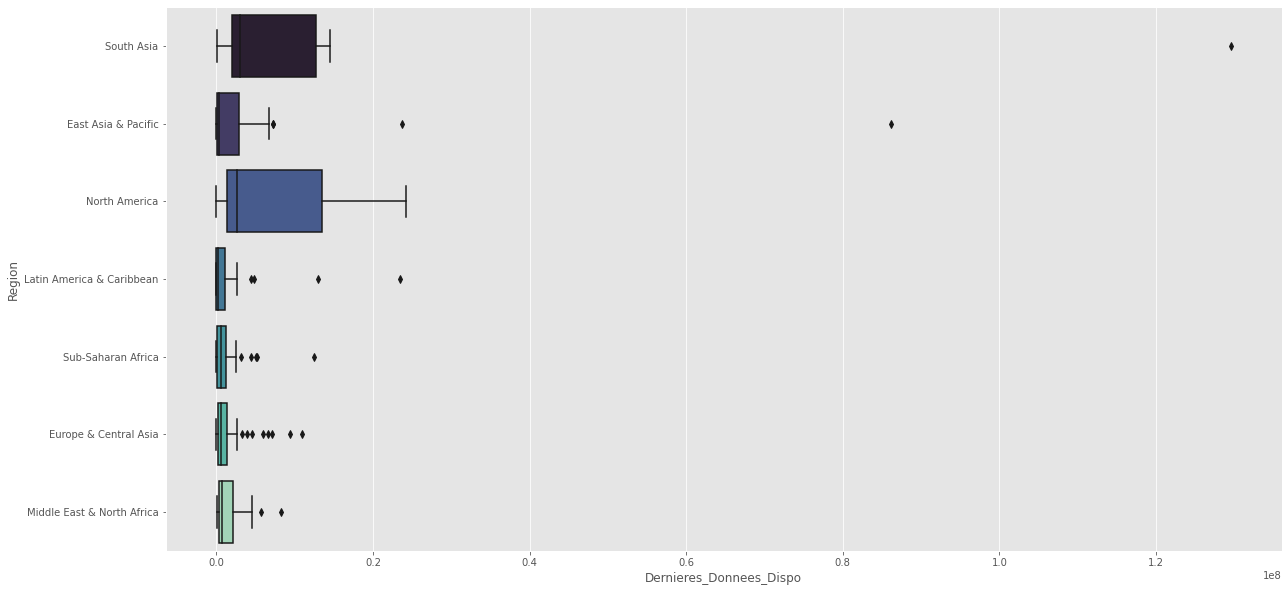

In [55]:
plt.figure(figsize = (20,10))
plt.style.use('ggplot')

sns.boxplot(x='Dernieres_Donnees_Dispo', y='Region', data=df_inscription, palette="mako")

Là encore, nous constatons plusieurs outliers suivant les régions géographiques. En terme de nombre d'inscriptions au secondaire, l'Asie du sud et l'Amérique du Nord semblent être les plus attractifs.

In [56]:
df_inscription.groupby('Region')['Dernieres_Donnees_Dispo'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,30.0,4.965728e+06,16012298.00,1289.0,27017.50,330163.0,2836163.25,86127200.0
Europe & Central Asia,51.0,1.513734e+06,2443860.25,2407.0,236775.50,553448.0,1390436.00,10969178.0
Latin America & Caribbean,38.0,1.653885e+06,4305782.00,2013.0,11718.00,278941.0,1097407.50,23501784.0
Middle East & North Africa,20.0,1.768009e+06,2187589.25,29434.0,286848.25,766943.0,2166644.25,8208329.0
North America,3.0,8.977108e+06,13277673.00,4040.0,1350773.50,2697507.0,13463642.00,24229776.0
South Asia,8.0,2.060894e+07,44346372.00,28878.0,1972754.50,2988023.5,12700130.50,129542056.0
Sub-Saharan Africa,47.0,1.229300e+06,2104588.75,7394.0,131221.00,567838.0,1210242.00,12532753.0


---

### Indicateur: Expenditure on secondary as % of government expenditure on education (%)

In [57]:
df_expenditure = df[df['Indicator Name'].isin(['Expenditure on secondary as % of government expenditure on education (%)'])].sort_values('Dernieres_Donnees_Dispo', ascending=False)
df_expenditure.head(100)

,Region,Income Group,Country Name,Indicator Name,Dernieres_Donnees_Dispo
455696,Europe & Central Asia,Upper middle income,Kazakhstan,Expenditure on secondary as % of government ex...,65.760048
554651,Sub-Saharan Africa,Upper middle income,Mauritius,Expenditure on secondary as % of government ex...,64.140472
195481,East Asia & Pacific,High income: nonOECD,Brunei Darussalam,Expenditure on secondary as % of government ex...,60.844349
518001,East Asia & Pacific,High income: nonOECD,"Macao SAR, China",Expenditure on secondary as % of government ex...,55.062309
122181,Europe & Central Asia,Lower middle income,Armenia,Expenditure on secondary as % of government ex...,54.462040
224801,Latin America & Caribbean,High income: nonOECD,Cayman Islands,Expenditure on secondary as % of government ex...,54.026348
257786,Sub-Saharan Africa,Lower middle income,"Congo, Rep.",Expenditure on secondary as % of government ex...,53.331680
682926,Sub-Saharan Africa,Low income,Rwanda,Expenditure on secondary as % of government ex...,52.825241
217471,Sub-Saharan Africa,Lower middle income,Cameroon,Expenditure on secondary as % of government ex...,52.553139
748896,South Asia,Lower middle income,Sri Lanka,Expenditure on secondary as % of government ex...,49.336910


<AxesSubplot:xlabel='Dernieres_Donnees_Dispo', ylabel='Region'>

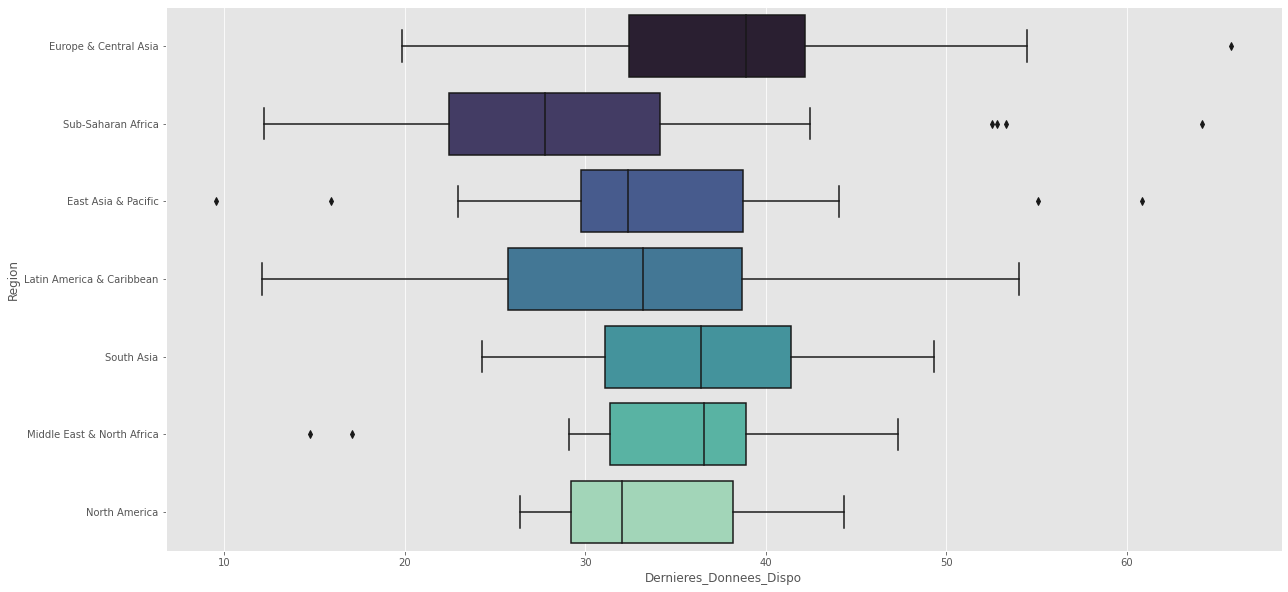

In [58]:
plt.figure(figsize = (20,10))
plt.style.use('ggplot')

sns.boxplot(x='Dernieres_Donnees_Dispo', y='Region', data=df_expenditure, palette="mako")

Les aides du gouvernements sont très variables d'un pays à l'autre pour la région de l'Europe et de l'Asie centrale. Globalement, elles sont également moins présentes dans les pays de l'Afrique et de l'Amérique latine.

In [59]:
df_expenditure.groupby('Region')['Dernieres_Donnees_Dispo'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,23.0,33.814423,10.916718,9.564900,29.754325,32.361992,38.749454,60.844349
Europe & Central Asia,41.0,37.734344,8.431487,19.831560,32.417389,38.911850,42.184719,65.760048
Latin America & Caribbean,34.0,31.969009,9.990856,12.111410,25.742217,33.212811,38.699508,54.026348
Middle East & North Africa,12.0,34.222649,9.869603,14.740590,31.380336,36.557911,38.879120,47.340981
North America,3.0,34.246689,9.157206,26.404249,29.214984,32.025719,38.167910,44.310101
South Asia,8.0,35.872272,8.605157,24.305269,31.078145,36.408430,41.387489,49.336910
Sub-Saharan Africa,44.0,29.489311,11.181931,12.225920,22.478843,27.747525,34.139230,64.140472


---

### Indicateur: Internet users (per 100 people)

In [60]:
df_internet = df[df['Indicator Name'].isin(['Internet users (per 100 people)'])].sort_values('Dernieres_Donnees_Dispo', ascending=False)
df_internet.head(100)

,Region,Income Group,Country Name,Indicator Name,Dernieres_Donnees_Dispo
411855,Europe & Central Asia,High income: OECD,Iceland,Internet users (per 100 people),98.240013
507145,Europe & Central Asia,High income: nonOECD,Liechtenstein,Internet users (per 100 people),98.093903
169965,North America,High income: nonOECD,Bermuda,Internet users (per 100 people),98.000000
144310,Middle East & North Africa,High income: nonOECD,Bahrain,Internet users (per 100 people),97.999977
107660,Europe & Central Asia,High income: nonOECD,Andorra,Internet users (per 100 people),97.930634
514475,Europe & Central Asia,High income: OECD,Luxembourg,Internet users (per 100 people),97.493927
628090,Europe & Central Asia,High income: OECD,Norway,Internet users (per 100 people),97.298203
287245,Europe & Central Asia,High income: OECD,Denmark,Internet users (per 100 people),96.967789
569450,Europe & Central Asia,High income: nonOECD,Monaco,Internet users (per 100 people),95.208176
327560,Europe & Central Asia,High income: nonOECD,Faroe Islands,Internet users (per 100 people),95.108681


<AxesSubplot:xlabel='Dernieres_Donnees_Dispo', ylabel='Region'>

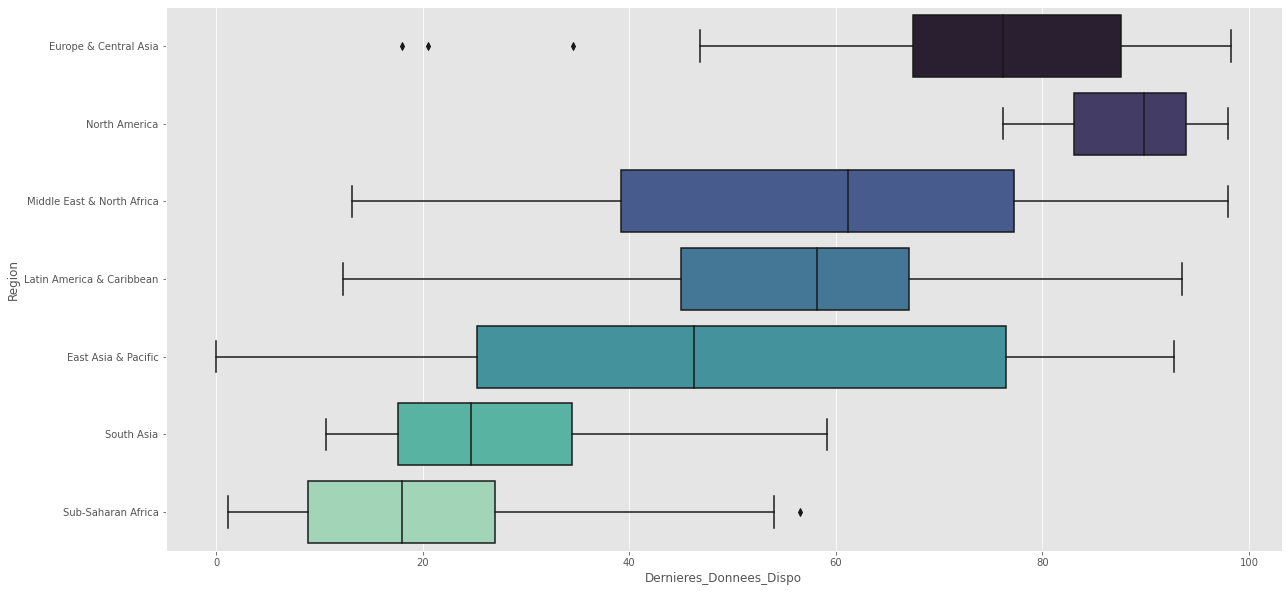

In [61]:
plt.figure(figsize = (20,10))
plt.style.use('ggplot')

sns.boxplot(x='Dernieres_Donnees_Dispo', y='Region', data=df_internet, palette="mako")

Nous constatons de vraies disparités entre les régions. Les pays de l'Afrique et du sud de l'Asie peinent à atteindre le taux de 60% d'internautes, alors que les pays d'Europe et de l'Amérique du Nord affichent les meilleurs résultats.

In [62]:
df_internet.groupby('Region')['Dernieres_Donnees_Dispo'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,34.0,48.323441,28.263468,0.000000,25.276263,46.254576,76.507502,92.716545
Europe & Central Asia,54.0,74.319664,18.374950,17.990324,67.417849,76.154724,87.587072,98.240013
Latin America & Caribbean,37.0,55.996937,18.057180,12.232601,45.000000,58.136494,67.029999,93.542458
Middle East & North Africa,21.0,57.957451,25.716167,13.134915,39.213814,61.178387,77.289398,97.999977
North America,3.0,88.005577,11.026674,76.176735,83.008366,89.839996,93.919998,98.000000
South Asia,8.0,28.313671,16.024294,10.595726,17.563843,24.617964,34.481413,59.092590
Sub-Saharan Africa,47.0,20.312099,14.590605,1.177119,8.868023,18.000000,26.943613,56.514709


In [63]:
df_indicators = df.pivot(index=['Country Name', 'Region'], 
                         columns='Indicator Name', 
                         values='Dernieres_Donnees_Dispo').reset_index().rename_axis(None, axis=1)

df_indicators.head()

,Country Name,Region,"Enrolment in secondary education, both sexes (number)",Expenditure on secondary as % of government expenditure on education (%),Internet users (per 100 people),"Population, total"
0,Afghanistan,South Asia,2698816.0,24.35630,10.595726,34656032.0
1,Albania,Europe & Central Asia,315079.0,19.83156,66.363441,2876101.0
2,Algeria,Middle East & North Africa,4572513.0,NaN,42.945526,40606052.0
3,American Samoa,East Asia & Pacific,NaN,NaN,NaN,55599.0
4,Andorra,Europe & Central Asia,4395.0,24.91345,97.930634,77281.0


Text(0.5, 1.0, 'Corrélation HeatMap')

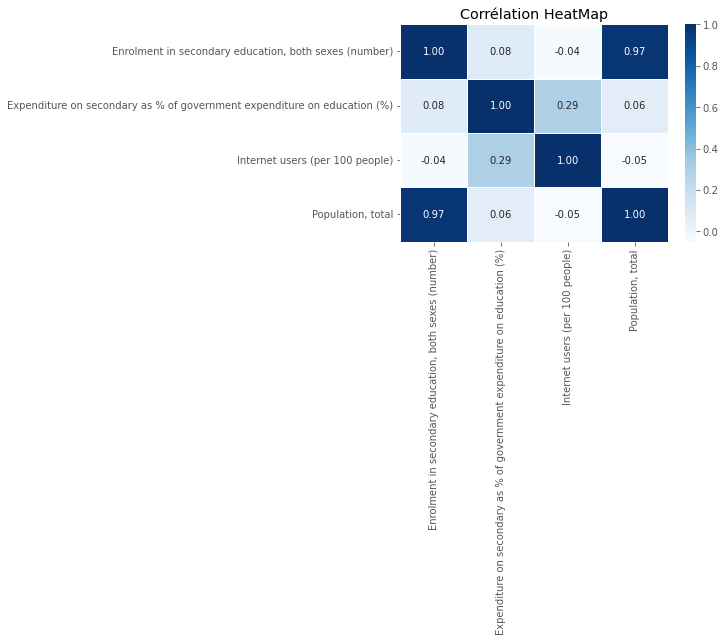

In [64]:
sns.heatmap(df_indicators.corr(), annot=True,fmt=".2f", cmap='Blues', linewidths=1.0)
plt.title('Corrélation HeatMap')

Il n'y a pas de corrélation flagrante entre les différentes variables sauf entre le nombre de population et le nombre d'inscription au secondaire, ce qui reste logique.

***

Pour nous permettre de classer les pays, nous apppliquons un scoring sur les 3 indicateurs sélectionnés. Nous ne prenons pas en compte le nombre de la population totale puisque nous nous appuyons sur les inscriptions du secondaire.

In [65]:
df_indicators['SCORE_INSCRIPTION'] = df_indicators['Enrolment in secondary education, both sexes (number)']/df_indicators['Enrolment in secondary education, both sexes (number)'].max()
df_indicators['SCORE_AIDE_GOUV'] = df_indicators['Expenditure on secondary as % of government expenditure on education (%)']/df_indicators['Expenditure on secondary as % of government expenditure on education (%)'].max()
df_indicators['SCORE_INTERNET'] = df_indicators['Internet users (per 100 people)']/df_indicators['Internet users (per 100 people)'].max()
df_indicators['SCORE'] = (df_indicators['SCORE_AIDE_GOUV'] * 0.2 + df_indicators['SCORE_INTERNET'] * 0.4 + df_indicators['SCORE_INSCRIPTION'] * 0.3)
df_classement = df_indicators.sort_values('SCORE', ascending = False)

df_classement.head(50)

,Country Name,Region,"Enrolment in secondary education, both sexes (number)",Expenditure on secondary as % of government expenditure on education (%),Internet users (per 100 people),"Population, total",SCORE_INSCRIPTION,SCORE_AIDE_GOUV,SCORE_INTERNET,SCORE
86,India,South Asia,1.295421e+08,41.352940,29.547163,1.324171e+09,1.000000,0.628846,0.300765,0.546075
111,Liechtenstein,Europe & Central Asia,3.349000e+03,47.428379,98.093903,3.766600e+04,0.000026,0.721234,0.998513,0.543660
21,Bermuda,North America,4.040000e+03,44.310101,98.000000,6.533100e+04,0.000031,0.673815,0.997557,0.533795
14,Bahrain,Middle East & North Africa,9.245400e+04,44.224640,97.999977,1.425171e+06,0.000714,0.672515,0.997557,0.533740
202,United Kingdom,Europe & Central Asia,6.556992e+06,41.035831,94.775803,6.563724e+07,0.050617,0.624024,0.964737,0.525885
113,Luxembourg,Europe & Central Asia,4.687200e+04,42.184719,97.493927,5.829720e+05,0.000362,0.641495,0.992405,0.525370
97,Kazakhstan,Europe & Central Asia,1.713090e+06,65.760048,76.800003,1.779703e+07,0.013224,1.000000,0.781759,0.516671
128,Monaco,Europe & Central Asia,3.297000e+03,41.061211,95.208176,3.849900e+04,0.000025,0.624410,0.969138,0.512545
71,Germany,Europe & Central Asia,7.112950e+06,41.965271,89.647102,8.266769e+07,0.054908,0.638158,0.912531,0.509117
95,Japan,East Asia & Pacific,7.227485e+06,37.804859,92.000000,1.269945e+08,0.055793,0.574891,0.936482,0.506309


Dans l'hypothèse où la start up Academy privilègerait une première implantation hors de France mais dans la zone de l'Europe, voici les 20 pays les mieux classés.

In [66]:
df_classement[df_classement['Region'] == 'Europe & Central Asia'].sort_values('SCORE', ascending = False).head(20)

,Country Name,Region,"Enrolment in secondary education, both sexes (number)",Expenditure on secondary as % of government expenditure on education (%),Internet users (per 100 people),"Population, total",SCORE_INSCRIPTION,SCORE_AIDE_GOUV,SCORE_INTERNET,SCORE
111,Liechtenstein,Europe & Central Asia,3349.00,47.428379,98.093903,37666.0,0.000026,0.721234,0.998513,0.543660
202,United Kingdom,Europe & Central Asia,6556991.50,41.035831,94.775803,65637240.0,0.050617,0.624024,0.964737,0.525885
113,Luxembourg,Europe & Central Asia,46872.00,42.184719,97.493927,582972.0,0.000362,0.641495,0.992405,0.525370
97,Kazakhstan,Europe & Central Asia,1713090.00,65.760048,76.800003,17797032.0,0.013224,1.000000,0.781759,0.516671
128,Monaco,Europe & Central Asia,3297.00,41.061211,95.208176,38499.0,0.000025,0.624410,0.969138,0.512545
71,Germany,Europe & Central Asia,7112949.50,41.965271,89.647102,82667688.0,0.054908,0.638158,0.912531,0.509117
143,Norway,Europe & Central Asia,437074.00,35.238491,97.298203,5232929.0,0.003374,0.535865,0.990413,0.504350
66,France,Europe & Central Asia,5947212.00,43.684490,85.622200,66896108.0,0.045910,0.664301,0.871561,0.495258
52,Denmark,Europe & Central Asia,553263.00,32.417389,96.967789,5731118.0,0.004271,0.492965,0.987050,0.494694
136,Netherlands,Europe & Central Asia,1613497.00,40.278721,90.410957,17018408.0,0.012455,0.612511,0.920307,0.494361


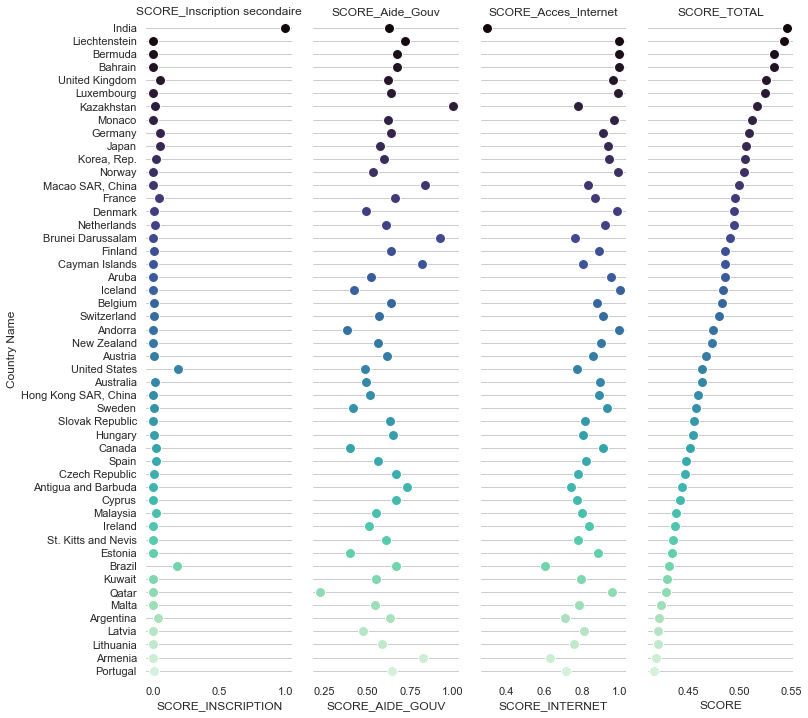

In [67]:
sns.set_theme(style="whitegrid")

# Faire les grilles
g = sns.PairGrid(df_classement.sort_values("SCORE", ascending=False)[:50], x_vars=df_classement.columns[-4 :], y_vars=["Country Name"], height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False, palette="mako", linewidth=1, edgecolor="w")

titles = ["SCORE_Inscription secondaire", "SCORE_Aide_Gouv", "SCORE_Acces_Internet", "SCORE_TOTAL"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

plt.savefig('SCORE_PairGrid.png')

# Résultats


Ce graphique nous permet de visualiser chaque performance des indicateurs. Le score final, calculé grâce à des coefficients nous donne un classement des pays les plus "favorables" à un développement de cours éducatifs en ligne.  

**Hors zone €uro:** l'Inde, Les Bermudes, le Barhein, le Kazakhstan, le Japon  

**Zone €uro:** Liechtenstein, le Royaume Uni, Le Luxembourg, La principauté de Monaco, l'Allemagne.  
  
Il serait certainement plus facile dans un premier temps de cibler des pays dans la zone Europe du fait de leur proximité.

Pour ce rendre compte de l'évolution des indicateurs sélectionnés, nous avons représenté peu après, des graphes d'évolution.
Pour le Lichetenstein qui peut être considéré comme un petit pays, nous remarquons que presque 100% de la population est internaute.

Pour ce qui est de l'Inde, ce pays a une des plus grande population du monde et l'évolution de la courbe des internautes est spéctaculaire. L'Inde est pays en plein développement.  




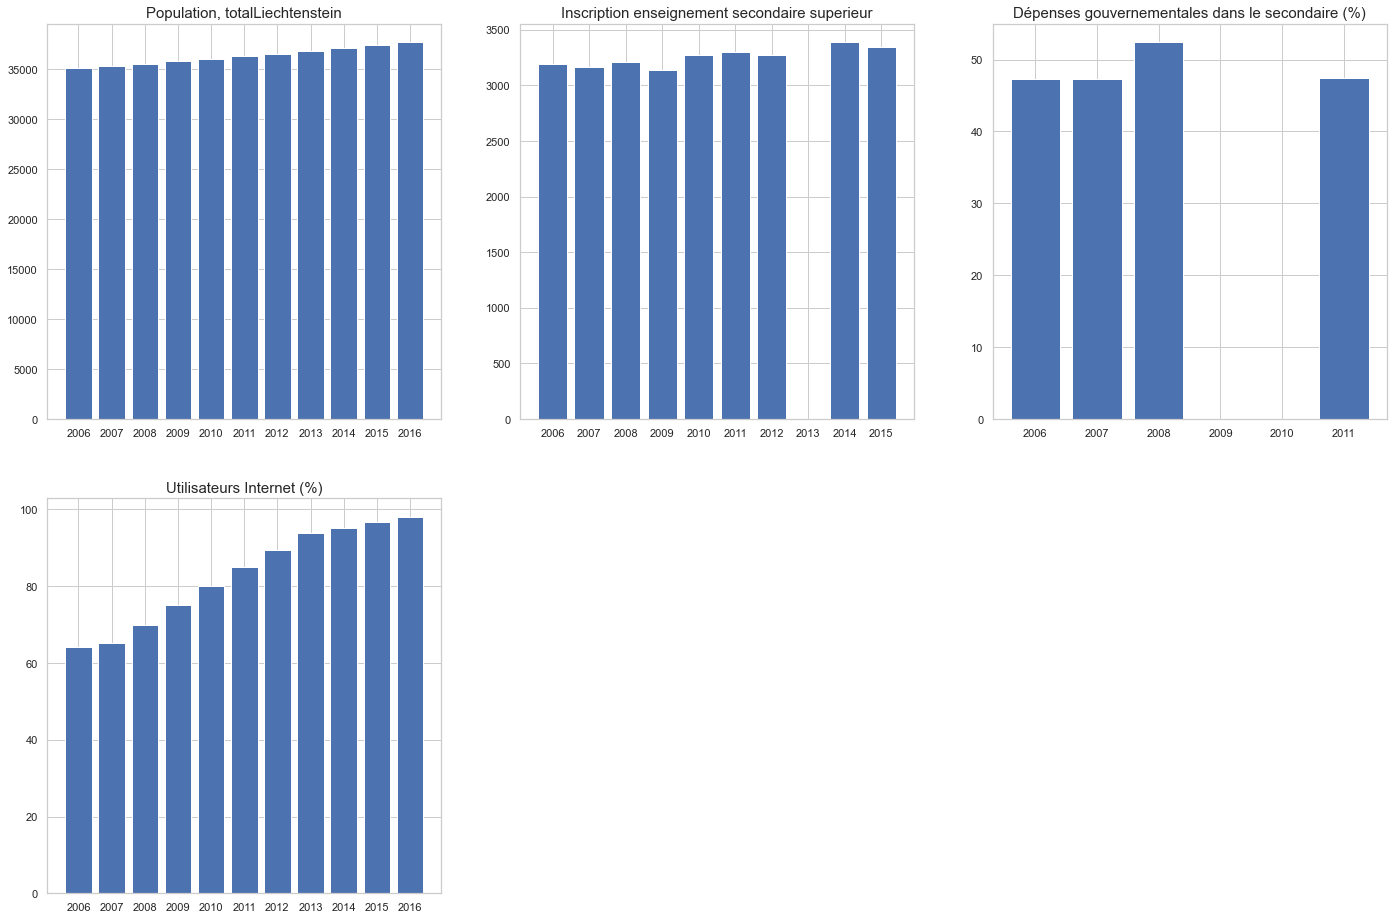

In [68]:
x = ('2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016')
pays_graph = 'Liechtenstein'

plt.rcParams["figure.figsize"] = [24, 16]
plt.tick_params(axis = 'both', labelsize = 15)

plt.subplot(231)
y = stats_data.loc[(stats_data['Country Name']==pays_graph) & (stats_data['Indicator Name']=='Population, total'),x].squeeze()
plt.title('Population, total'+pays_graph).set_fontsize(15)
plt.bar(x,y)

plt.subplot(232)
y = stats_data.loc[(stats_data['Country Name']==pays_graph) & (stats_data['Indicator Name']=='Enrolment in secondary education, both sexes (number)'),x].squeeze()
plt.title('Inscription enseignement secondaire superieur').set_fontsize(15)
plt.bar(x,y)

plt.subplot(233)
y = stats_data.loc[(stats_data['Country Name']==pays_graph) & (stats_data['Indicator Name']=='Expenditure on secondary as % of government expenditure on education (%)'),x].squeeze()
plt.title('Dépenses gouvernementales dans le secondaire (%)').set_fontsize(15)
plt.bar(x,y)

plt.subplot(234)
y = stats_data.loc[(stats_data['Country Name']==pays_graph) & (stats_data['Indicator Name']=='Internet users (per 100 people)'),x].squeeze()
plt.title('Utilisateurs Internet (%)').set_fontsize(15)
plt.bar(x,y)

plt.draw()

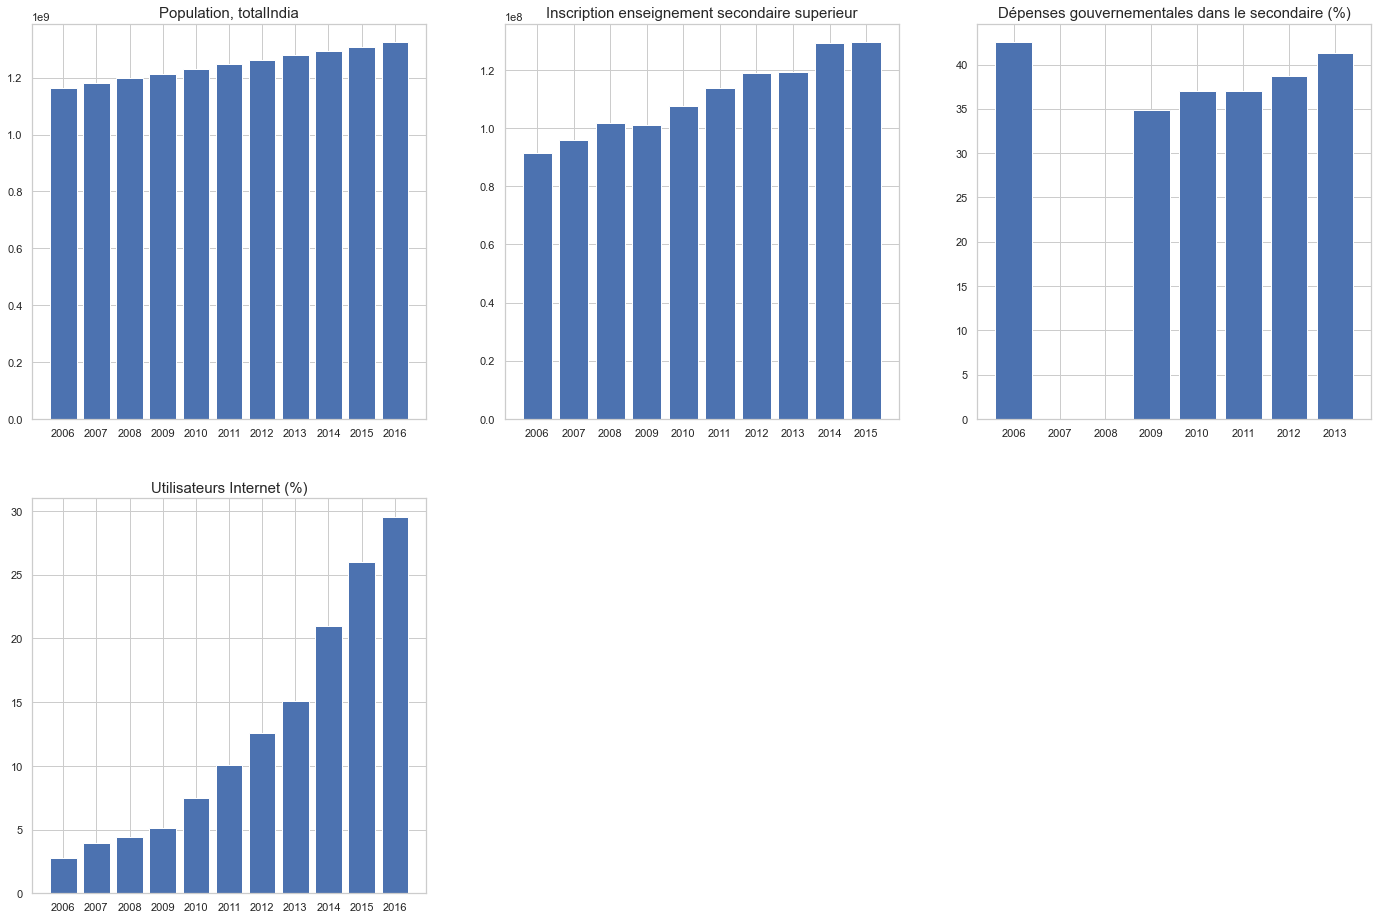

In [69]:
x = ('2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016')
pays_graph = 'India'

plt.rcParams["figure.figsize"] = [24, 16]
plt.tick_params(axis = 'both', labelsize = 15)

plt.subplot(231)
y = stats_data.loc[(stats_data['Country Name']==pays_graph) & (stats_data['Indicator Name']=='Population, total'),x].squeeze()
plt.title('Population, total'+pays_graph).set_fontsize(15)
plt.bar(x,y)

plt.subplot(232)
y = stats_data.loc[(stats_data['Country Name']==pays_graph) & (stats_data['Indicator Name']=='Enrolment in secondary education, both sexes (number)'),x].squeeze()
plt.title('Inscription enseignement secondaire superieur').set_fontsize(15)
plt.bar(x,y)

plt.subplot(233)
y = stats_data.loc[(stats_data['Country Name']==pays_graph) & (stats_data['Indicator Name']=='Expenditure on secondary as % of government expenditure on education (%)'),x].squeeze()
plt.title('Dépenses gouvernementales dans le secondaire (%)').set_fontsize(15)
plt.bar(x,y)

plt.subplot(234)
y = stats_data.loc[(stats_data['Country Name']==pays_graph) & (stats_data['Indicator Name']=='Internet users (per 100 people)'),x].squeeze()
plt.title('Utilisateurs Internet (%)').set_fontsize(15)
plt.bar(x,y)

plt.draw()

---

# Projections

In [70]:
# PRJ.POP.ALL.4.MF = Wittgenstein Projection: Population in thousands by highest level of educational attainment
# Projection de Wittgenstein : Population en milliers selon le niveau de scolarité le plus élevé

evolution = stats_data[['Country Name', 'Indicator Name','Indicator Code', '2030']].dropna()
evo = evolution[evolution['Indicator Code'].isin (['PRJ.POP.ALL.4.MF'])]
evo.sort_values(by = '2030', ascending = False).head(50)

,Country Name,Indicator Name,Indicator Code,2030
91610,World,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,1097776.66
245540,China,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,165561.25
417795,India,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,145784.61
850265,United States,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,111600.20
450780,Japan,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,50517.55
659685,Philippines,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,33650.46
681675,Russian Federation,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,26077.18
359155,Germany,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,25367.24
421460,Indonesia,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,24959.68
623035,Nigeria,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,24306.68


Il existe un très fort potentiel sur les pays tels que la Chine, l'Inde, les USA et le Japon.

--- 

# Conclusion

Ce jeu de données nous permet de tirer quelques conclusions sur les éventuels pays à cibler pour une expansion à l'international. Les caractéristiques des pays étant très diverses (barrière de la langue, différences cculturelles...), il conviendra de compléter cette étude avec d'autres études: étude concurrentielle par exemple.
Il est également nécessaire d'étayer la stratégie de la startup (ex: budget, ressources allouées... ) pour son projet afin de répondre au mieux à la problématique.
  